# Map making in Python with Basemap

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


 And we will also import Basemap...

In [ ]:
from mpl_toolkits.basemap import Basemap

### A global earthquake dataset
The US government maintains a set of live feeds of earthquake-related data from recent seismic events. You can choose to examine data from the last hour, through the last thirty days. You can choose to examine data from events that have a variety of magnitudes. For this project, we'll use a dataset that contains all major (have a magnitude of 6 or greater) seismic events from 1973 until November 2015.

In [33]:
df = pd.read_csv('neic_new.csv', parse_dates=['time'])
df.head(10)

,time,latitude,longitude,depth,mag,place
0,1973-01-01 11:42:37.500,-35.513,-16.211,33.0,6.0,southern Mid-Atlantic Ridge
1,1973-01-05 13:54:29.100,-38.997,175.232,150.0,6.2,North Island of New Zealand
2,1973-01-06 15:52:41.900,-14.665,166.384,36.0,6.1,Vanuatu
3,1973-01-18 09:28:14.100,-6.868,149.993,43.0,6.8,"New Britain region, Papua New Guinea"
4,1973-01-22 00:37:58.000,18.601,-104.967,33.0,6.1,"offshore Jalisco, Mexico"
5,1973-01-27 13:08:43.700,-0.115,123.931,55.0,6.0,"Sulawesi, Indonesia"
6,1973-01-30 21:01:12.500,18.481,-102.996,43.0,7.5,"Michoacan, Mexico"
7,1973-01-31 20:55:53.100,28.206,139.227,498.0,6.0,"Bonin Islands, Japan region"
8,1973-02-01 05:14:20.600,-22.655,-66.195,229.0,6.1,"Jujuy, Argentina"
9,1973-02-06 10:37:10.100,31.398,100.581,33.0,7.4,"western Sichuan, China"


To examine descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution we can use ``describe`` method.

In [35]:
df.describe()

,latitude,longitude,depth,mag
count,6017.000000,6017.000000,6017.000000,6017.000000
mean,1.694113,42.677614,72.924107,6.378672
std,29.518378,124.818928,128.248487,0.414780
min,-66.448000,-179.997000,1.000000,6.000000
25%,-18.171000,-74.727000,14.000000,6.100000
50%,-3.584000,110.179000,33.000000,6.200000
75%,26.003000,146.543000,50.900000,6.500000
max,84.948000,179.998000,688.000000,9.100000


To find 10 greatest earthquakes, we can list first ten rows of sorted dataframe.

In [36]:
df.sort_values(by=['mag'], ascending=False).head(10)

,time,latitude,longitude,depth,mag,place
4207,2004-12-26 00:58:53.450,3.2950,95.9820,30.00,9.1,off the west coast of northern Sumatra
5292,2011-03-11 05:46:24.120,38.2970,142.3730,29.00,9.0,"near the east coast of Honshu, Japan"
5101,2010-02-27 06:34:11.530,-36.1220,-72.8980,22.90,8.8,"offshore Bio-Bio, Chile"
4275,2005-03-28 16:09:36.530,2.0850,97.1080,30.00,8.6,"northern Sumatra, Indonesia"
5498,2012-04-11 08:38:36.720,2.3270,93.0630,20.00,8.6,off the west coast of northern Sumatra
4668,2007-09-12 11:10:26.830,-4.4380,101.3670,34.00,8.5,"southern Sumatra, Indonesia"
3696,2001-06-23 20:33:14.130,-16.2650,-73.6410,33.00,8.4,near the coast of southern Peru
5990,2015-09-16 22:54:32.860,-31.5729,-71.6744,22.44,8.3,"48km W of Illapel, Chile"
4012,2003-09-25 19:50:06.360,41.8150,143.9100,27.00,8.3,"Hokkaido, Japan region"
4509,2006-11-15 11:14:13.570,46.5920,153.2660,10.00,8.3,Kuril Islands


Which states are most commonly affected by strong earthquakes?

In [37]:
df['place'].str.split(',').str[-1].str.strip().value_counts().head(10)

Indonesia           536
Papua New Guinea    398
Japan               331
Chile               244
Vanuatu             243
Alaska              185
Philippines         185
Tonga               178
Solomon Islands     166
Fiji region         158
Name: place, dtype: int64

Is there relation between magnitude and number of earthquakes?

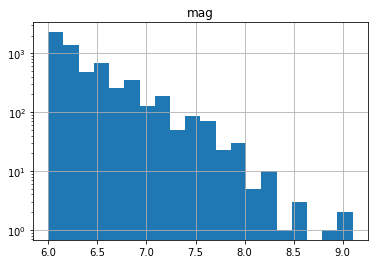

In [38]:
fig, ax = plt.subplots()
df.hist('mag', bins=20, ax=ax)
ax.set_yscale('log')

## Spatial distribution

We can see spatial distribution of earthquakes by plotting longitude and latitute of events.

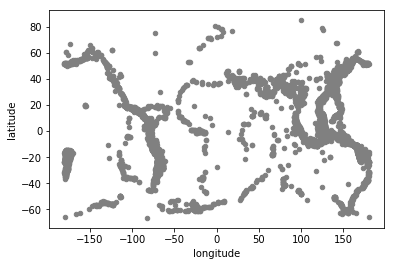

In [39]:
fig, ax = plt.subplots()
df.plot.scatter(x='longitude', y='latitude', c='grey', ax=ax);

We can also use information about magnitude to highlight greatest events...

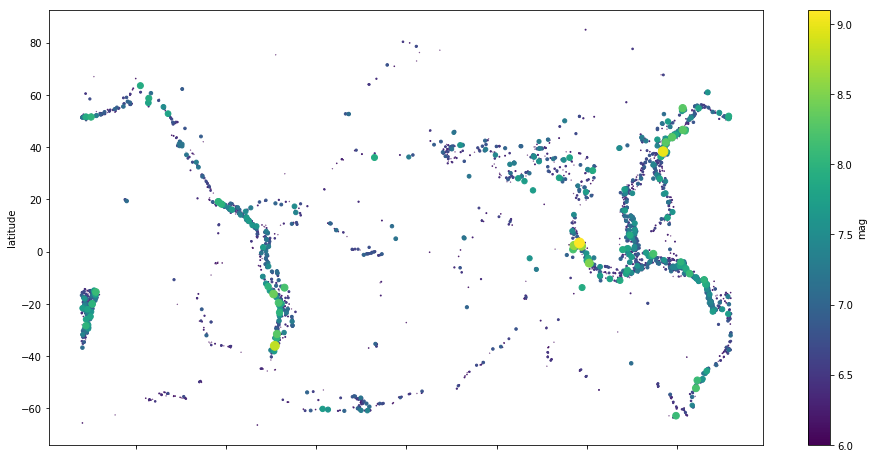

In [50]:
dfs = df.sort_values(by='mag')
dfs.plot.scatter(x='longitude',
                 y='latitude',
                 c='mag',
                 s=10*(dfs['mag'] - 6)**2,
                 colormap='viridis',
                 figsize=(16,8));

## How to make a maps nicer ?

Let's use Basemap to create our first map...

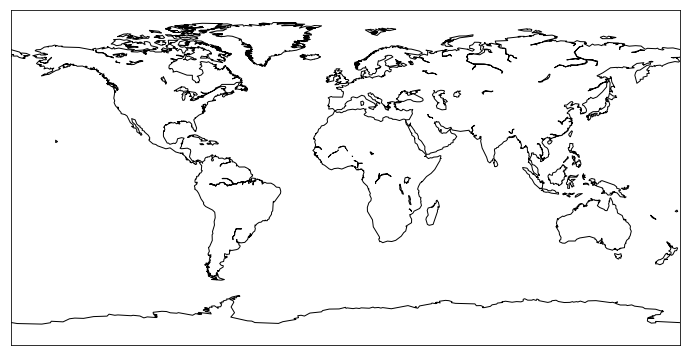

In [48]:
fig = plt.figure(figsize=(12, 8))
m = Basemap()
m.drawcoastlines();

We can easily control projection of map...

The default value is cyl, or *Cylindrical Equidistant projection*, also known as *Equirectangular projection* or *Plate Carrée*. Here is list of other possibilities

In [55]:
from mpl_toolkits.basemap import supported_projections
print(supported_projections)

 cyl              Cylindrical Equidistant                 
 merc             Mercator                                
 tmerc            Transverse Mercator                     
 omerc            Oblique Mercator                        
 mill             Miller Cylindrical                      
 gall             Gall Stereographic Cylindrical          
 cea              Cylindrical Equal Area                  
 lcc              Lambert Conformal                       
 laea             Lambert Azimuthal Equal Area            
 nplaea           North-Polar Lambert Azimuthal           
 splaea           South-Polar Lambert Azimuthal           
 eqdc             Equidistant Conic                       
 aeqd             Azimuthal Equidistant                   
 npaeqd           North-Polar Azimuthal Equidistant       
 spaeqd           South-Polar Azimuthal Equidistant       
 aea              Albers Equal Area                       
 stere            Stereographic                         

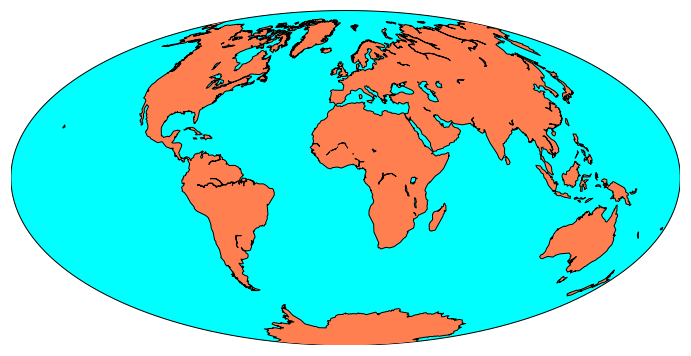

In [60]:
fig = plt.figure(figsize=(12, 8))
m = Basemap(projection='hammer', lon_0=0, resolution='c')
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='aqua')
m.drawcoastlines();

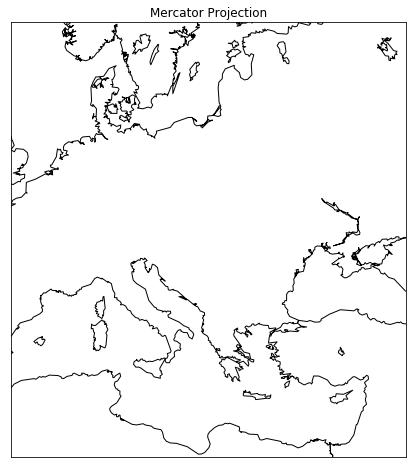

In [63]:
fig = plt.figure(figsize=(12, 8) )
m = Basemap(projection='merc',llcrnrlat=30,urcrnrlat=60,llcrnrlon=0,urcrnrlon=40,resolution='l')
m.drawcoastlines()
plt.title("Mercator Projection");

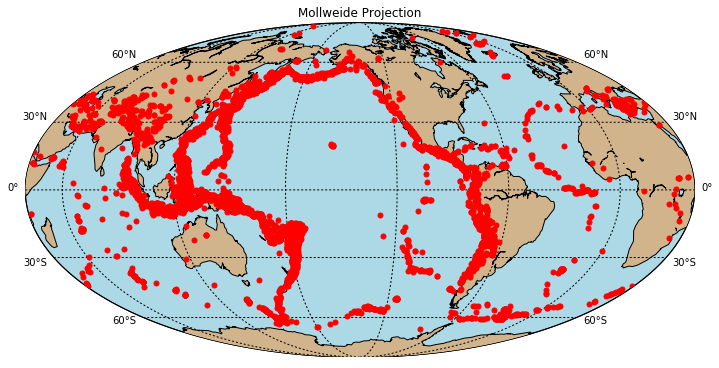

In [26]:
fig = plt.figure(num=None, figsize=(12, 8) )
m = Basemap(projection='moll', lon_0=-140, resolution='c')    
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,False],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
x, y = m(df['longitude'].tolist(), df['latitude'].tolist())
m.plot(x, y, 'ro', markersize=5)
plt.title("Mollweide Projection");

In [27]:
def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 6.5:
        return ('go')
    elif magnitude < 7.5:
        return ('yo')
    else:
        return ('ro')

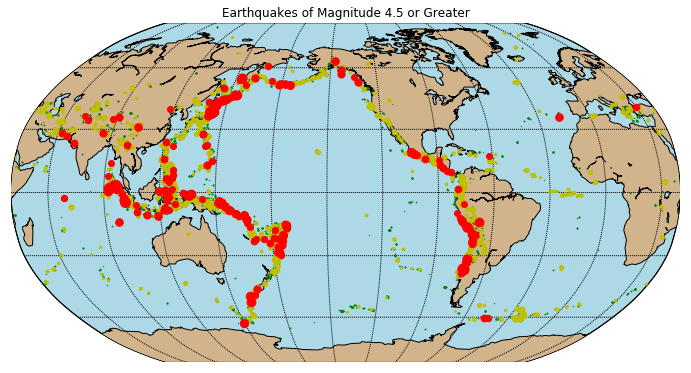

In [30]:
fig = plt.figure(num=None, figsize=(12, 8) )
m = Basemap(projection='robin', lon_0=-140, resolution='c')    
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawmeridians(np.arange(0, 360, 30))
m.drawparallels(np.arange(-90, 90, 30))
m.drawmapboundary(fill_color='lightblue')
for lon, lat, mag in zip(dfs['longitude'], dfs['latitude'], dfs['mag']):
    x, y = m(lon, lat)
    marker_string = get_marker_color(mag)
    m.plot(x, y, marker_string, markersize=4*(mag - 6))
plt.title("Earthquakes of Magnitude 4.5 or Greater");